<a href="https://colab.research.google.com/github/p-ai-org/p-colleges/blob/main/part1_2_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy import spatial
import string
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
#import stemmer 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
#import lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

#import word embedding 
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip


#import csv here and get column of mission statements

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--2023-03-08 00:12:42--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2023-03-08 00:12:43--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-03-08 00:12:43--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [ ]:
# text copied from csv file

mission_statement = 'Whittier is a place where students /234/ + - 131 faculty become actively involved in the local community as they explore their role in the global community, too. Our residential nature is a key component in defining who we are, as students and professors live and learn in close proximity to one another, fostering an atmosphere where knowledge can be pursued 24/7. This is a community where individuality is valued, tolerance is cherished, and the things that make each of us unique are seen as invaluable tools in seeking greater knowledge and understanding.'

In [ ]:
!wget https://raw.githubusercontent.com/p-ai-org/p-colleges/main/Brian/Brian%20Reddit/ucla.txt

--2023-03-07 23:50:32--  https://raw.githubusercontent.com/p-ai-org/p-colleges/main/Brian/Brian%20Reddit/ucla.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811610 (793K) [text/plain]
Saving to: ‘ucla.txt’

ucla.txt            100%[===================>] 792.59K  --.-KB/s    in 0.05s   

2023-03-07 23:50:34 (14.5 MB/s) - ‘ucla.txt’ saved [811610/811610]



In [ ]:
with open("ucla.txt") as file:
    ucla = file.read().replace('\n',' ')
     
print(ucla)

Spanish Tutor ($20/hr) Hello I am not a student here. I am wondering if anyone who is a native speaker (good at conversational spanish and spanish writing) to tutor Spanish weekly (1-2 hr per week). Please DM me if interested. buying brunch swipe tomorrow at Deneve. thx  No Liquor Stores near UCLA Is there a reason for there being no liquor stores in all of Westwood? I'm so tired of having to go ralphs/target and having to wait in a long-ass line (no self-checkout) just for some overpriced, poor-selection alcohol. I get having to deal with fake ids / underage college students would be annoying, but a convenient way to buy alcohol is so needed here. Ucla best exterminator  Hamilton or Jiang for Physics 5C Any thoughts? Hamilton doesn't have any reviews on Bruinwalk and Jiang had kind of mixed reviews. Thank you! Jungle Gym this just looks so fun and silly to climb i peaked thru the fence the other day and it was at like 10 pm and there was just this like 50 foot drop into a dark black p

In [ ]:
#naming word embedding data 
!head -n 1000 glove.42B.300d.txt > top_1000.txt

In [ ]:
embeddings = {}
with open('top_1000.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings[word] = vector
        
words_with_embeddings = set([w for w in embeddings])

In [ ]:
def clean(text):
  '''
  cleans text by changing text to a list of words, removing punctuation, numbers, unwanted characters (, ’ ” + ), 
  changin to lower case, and removing stop words. 
  '''
  text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', '', text)
  # Remove non-alphanumeric characters
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  
  new_list = []
  # clean description
  text = text.translate(str.maketrans('', '', string.punctuation))
  description = text.lower().strip()
  words = description.split(" ")
  stops = set(stopwords.words('english'))

  #filter out numbers/characters
  new_list = [x for x in words if not any(c.isdigit() or c in ['+', '-', '/', '"', "'"] for c in x)]
    
  #removes any empty strings
  new_list = list(filter(None, new_list))

  # filter out stop words
  new_list = [w for w in new_list if not w in stops] 
  

  return new_list

In [ ]:
clean(mission_statement)

'Whittier is a place where students 234   131 faculty become actively involved in the local community as they explore their role in the global community too Our residential nature is a key component in defining who we are as students and professors live and learn in close proximity to one another fostering an atmosphere where knowledge can be pursued 247 This is a community where individuality is valued tolerance is cherished and the things that make each of us unique are seen as invaluable tools in seeking greater knowledge and understanding'

In [ ]:
def stem(words):
  '''
  takes in a clean list of words, uses stemmer to return a list of lemmas for words without duplicates
  '''
  new_list = []
  for w in words:
    x = ps.stem(w)
    if x not in new_list:
      new_list += [x]
  return new_list
  

In [ ]:
#testing out the stemmer
stem(clean(mission_statement))

['whittier',
 'place',
 'student',
 'faculti',
 'becom',
 'activ',
 'involv',
 'local',
 'commun',
 'explor',
 'role',
 'global',
 'residenti',
 'natur',
 'key',
 'compon',
 'defin',
 'professor',
 'live',
 'learn',
 'close',
 'proxim',
 'one',
 'anoth',
 'foster',
 'atmospher',
 'knowledg',
 'pursu',
 'individu',
 'valu',
 'toler',
 'cherish',
 'thing',
 'make',
 'us',
 'uniqu',
 'seen',
 'invalu',
 'tool',
 'seek',
 'greater',
 'understand']

In [ ]:
def lemma(words):
  '''
  takes in a clean list of words, uses stemmer to return a list of lemmas for words without duplicates
  '''
  new_list = []
  for w in words:
    x = lemmatizer.lemmatize(w)
    if x not in new_list:
      new_list += [x]
  return new_list


In [ ]:
#testing out lemma
lemma(clean(mission_statement))

['whittier',
 'place',
 'student',
 'faculty',
 'become',
 'actively',
 'involved',
 'local',
 'community',
 'explore',
 'role',
 'global',
 'residential',
 'nature',
 'key',
 'component',
 'defining',
 'professor',
 'live',
 'learn',
 'close',
 'proximity',
 'one',
 'another',
 'fostering',
 'atmosphere',
 'knowledge',
 'pursued',
 'individuality',
 'valued',
 'tolerance',
 'cherished',
 'thing',
 'make',
 'u',
 'unique',
 'seen',
 'invaluable',
 'tool',
 'seeking',
 'greater',
 'understanding']

In [ ]:
def calculate_description_embedding(words):
  '''
  takes in a clean list of words, finds the word embeddings for each word, and finds the average word embedding for the list of words.
  '''
  #removes any words not in words embedding list
  words = [w for w in words if (w in words_with_embeddings)]
    
  if len(words) == 0:
      return None
    
  # calculate embedding and return
  return sum([embeddings[w] for w in words])/len(words)

In [ ]:
#trying everything out 

calculate_description_embedding(stem(clean(mission_statement)))

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.1 MB/s eta 0:00:00


In [35]:
#SENTIMENT ANALYSIS 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt

def get_sentiment(polarity):
    if polarity < -0.5:
      return 'Very Negative'
    elif polarity >= -0.5 and polarity < -0.1:
      return 'Negative'
    elif polarity > 0.1 and polarity < 0.5:
      return 'Positive'
    elif polarity >= 0.5:
        return 'Very Positive'
    else:
        return 'Neutral'

In [33]:
def graph_sentiment(text):
  '''assumes text is a list that has been cleaned and lemmatized already, outputting a graph of sentiment analysis
  '''
  df=pd.DataFrame()
  df['polarity']=[analyzer.polarity_scores(text)['compound'] for text in text]
  df['sentiment']=df.polarity.apply(get_sentiment)
  plt.figure(figsize=(3,3))
  df.sentiment.value_counts().plot.bar()

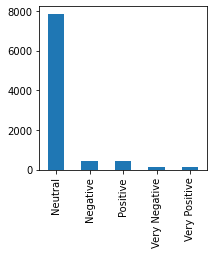

In [34]:
graph_sentiment(lemma(clean(ucla)))